In [11]:
# -*- coding: utf-8 -*-
"""
Created on Thu Apr 05 00:52:41 2024

@author: jobayel hossain
"""

# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


# Ignore warnings
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore')

# Suppress convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)


## ...........................Data Reading...................................##


# Read the data
df = pd.read_csv('heart.csv')

# Display basic information about the dataset
print("\n\nFirst few rows of the dataset:")
print(df.head())

print("\n\nInformation about the dataset:")
print(df.info())

print("\n\nShape of the dataset:")
print(df.shape)

# Calculate the percentage of null values in each column
missing_percentage = np.round(df.isna().sum() / len(df) * 100, 3)
print(missing_percentage)

# Check for duplicate records
duplicate_count = df.duplicated().sum()
print("\n\nTotal number of duplicate records:", duplicate_count)

# Get the list of categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Print the list of categorical columns
print("\n\nCategorical Columns:")
for col in categorical_cols:
    print(col)






First few rows of the dataset:
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  D

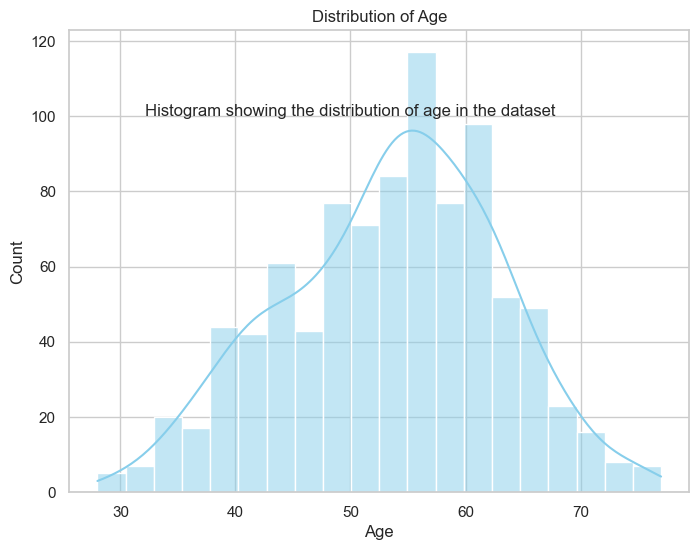

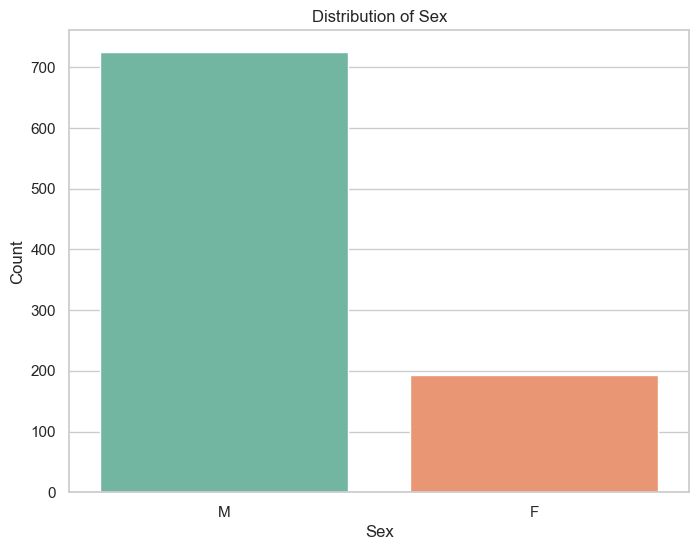

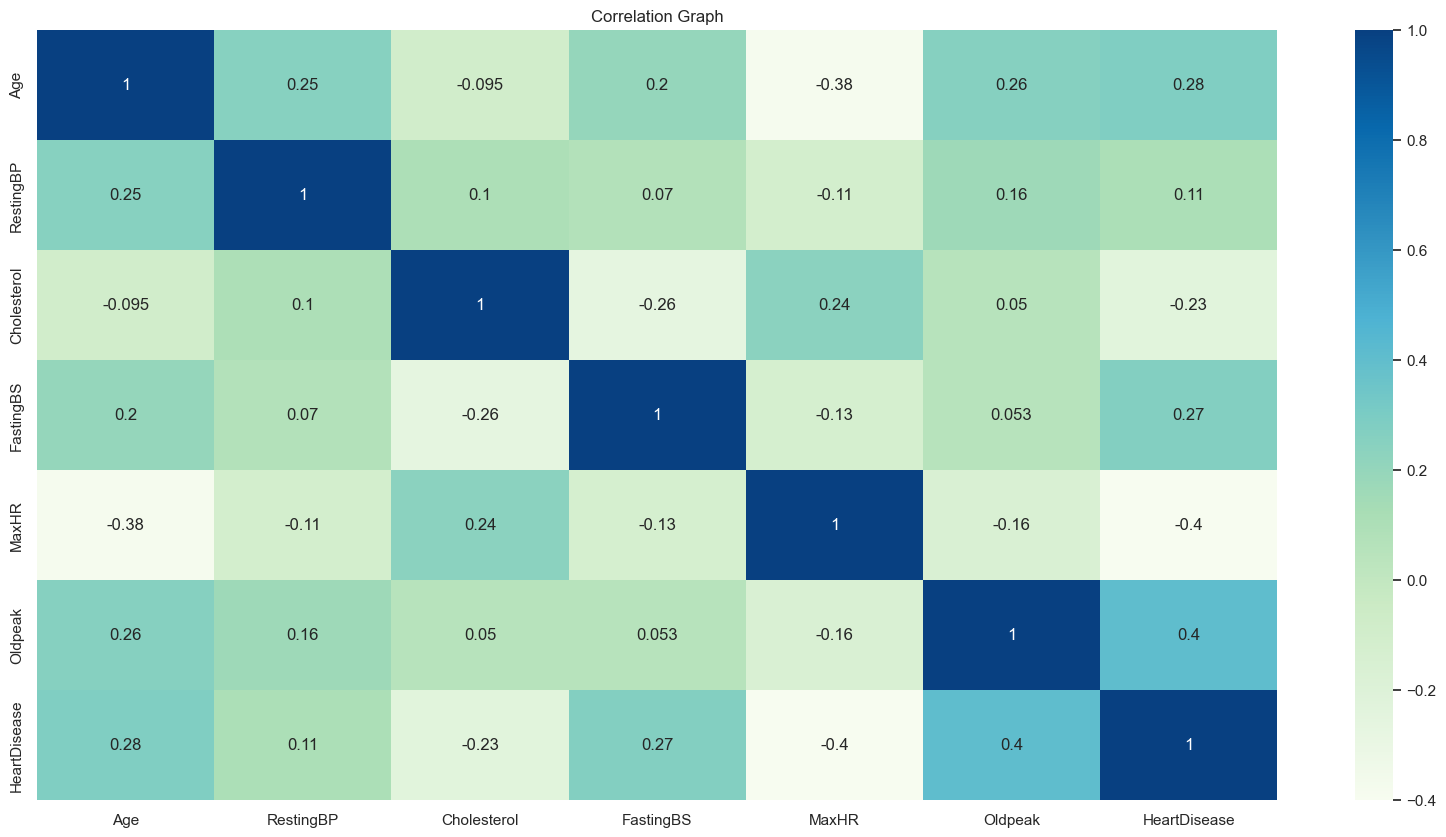

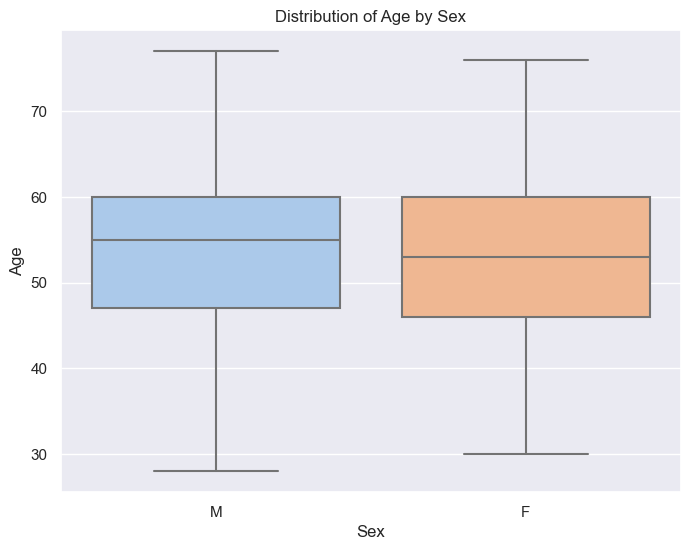

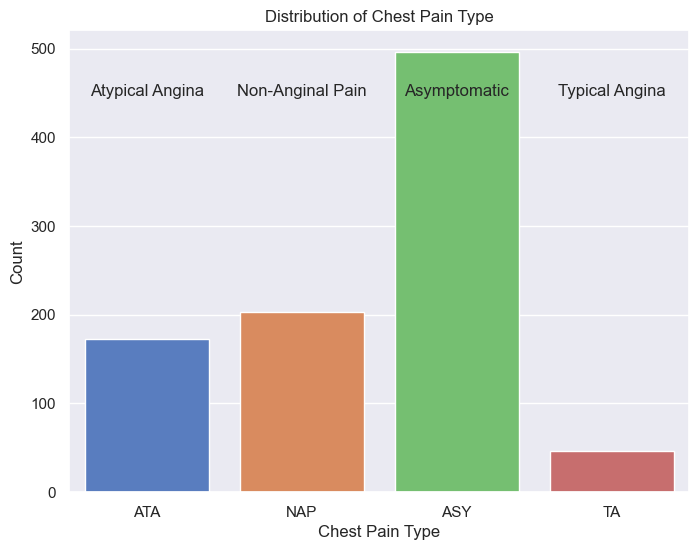

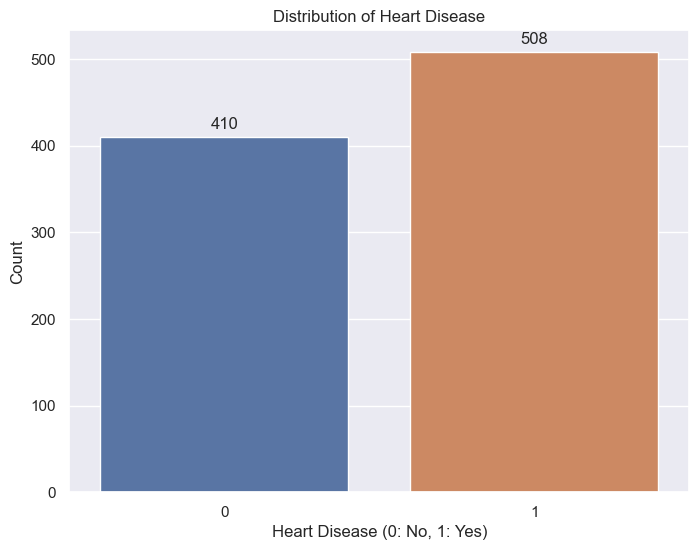

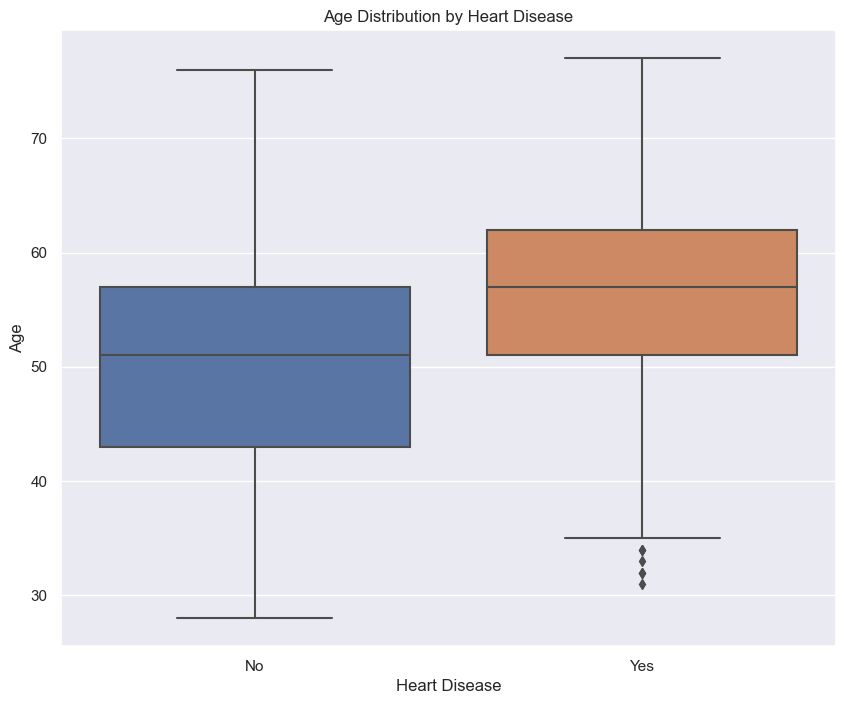

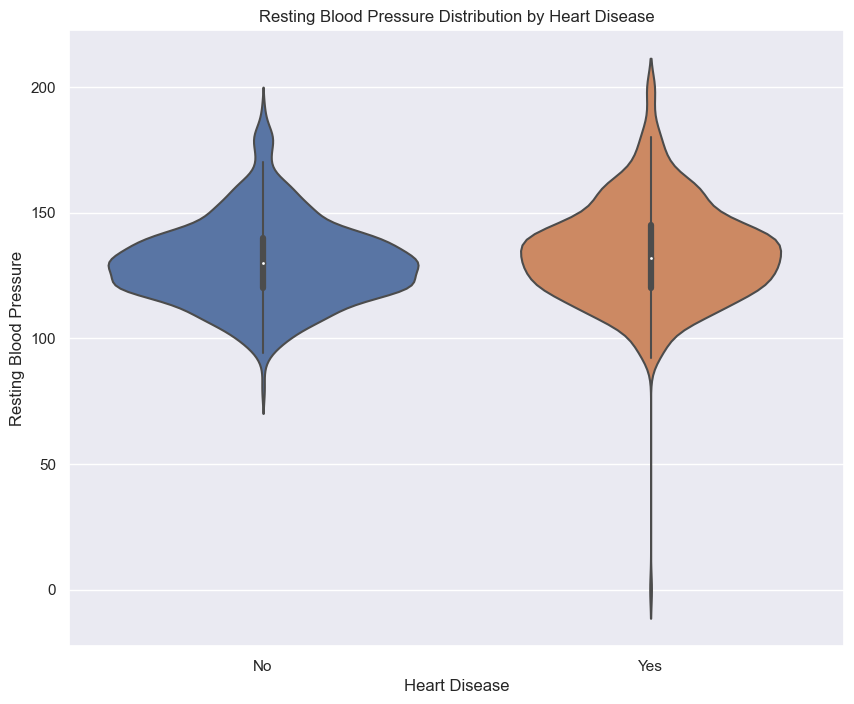

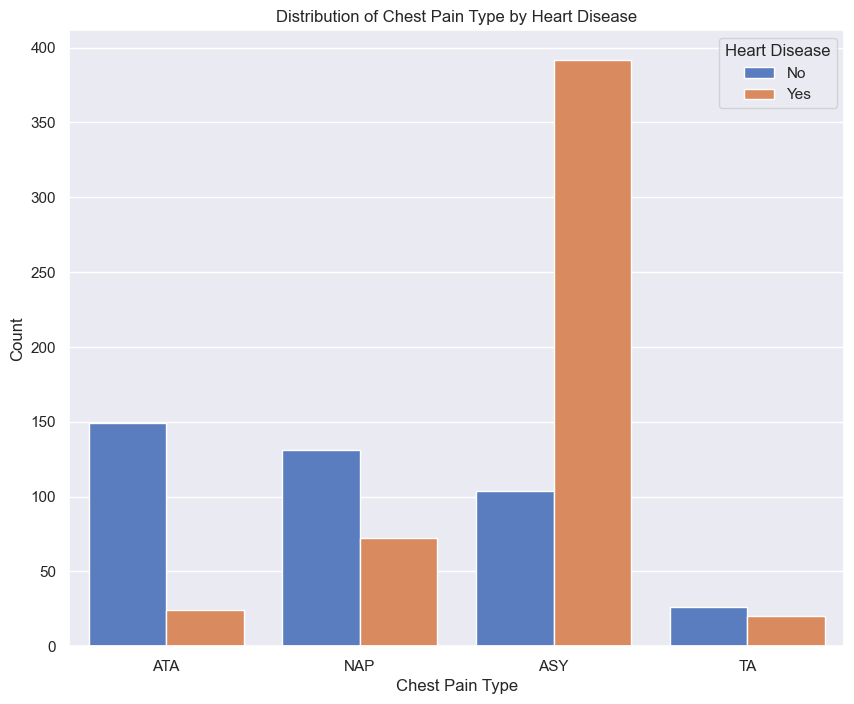

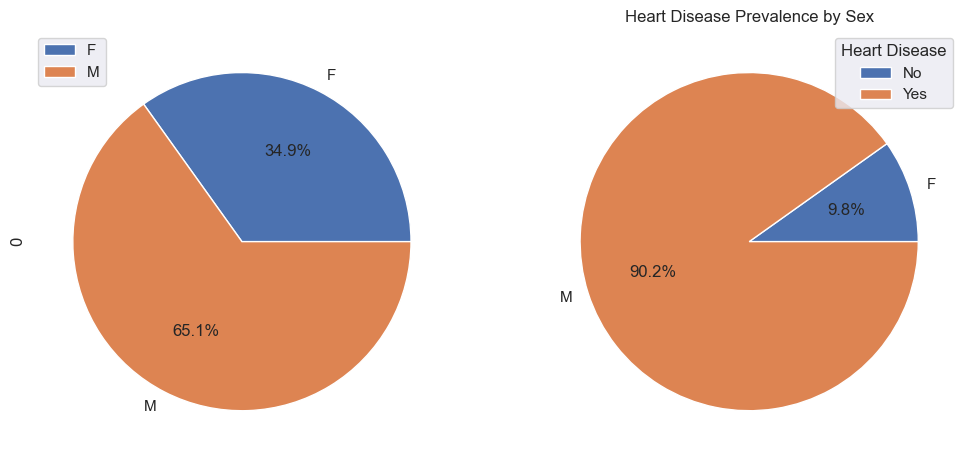

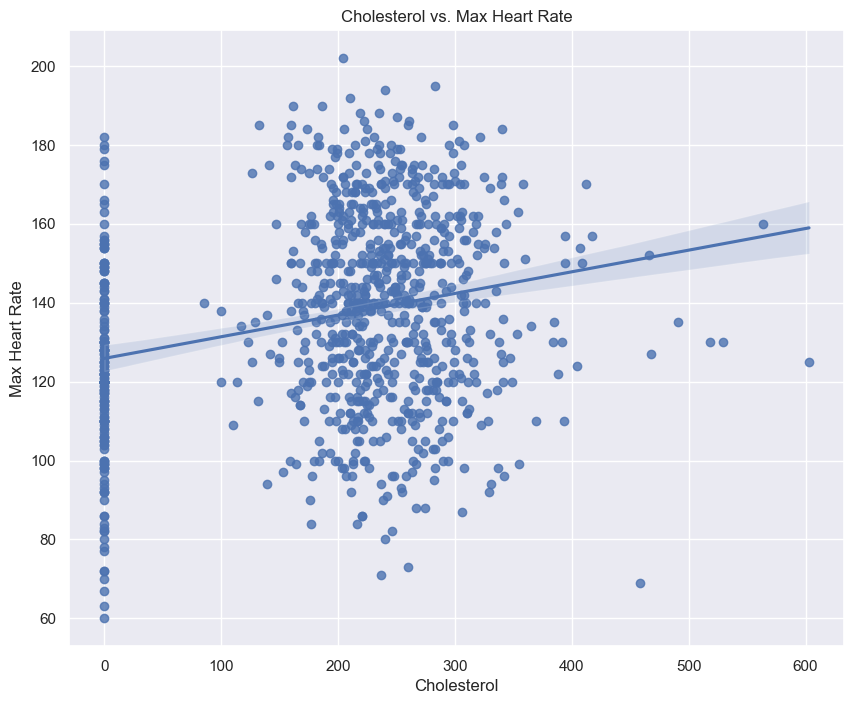

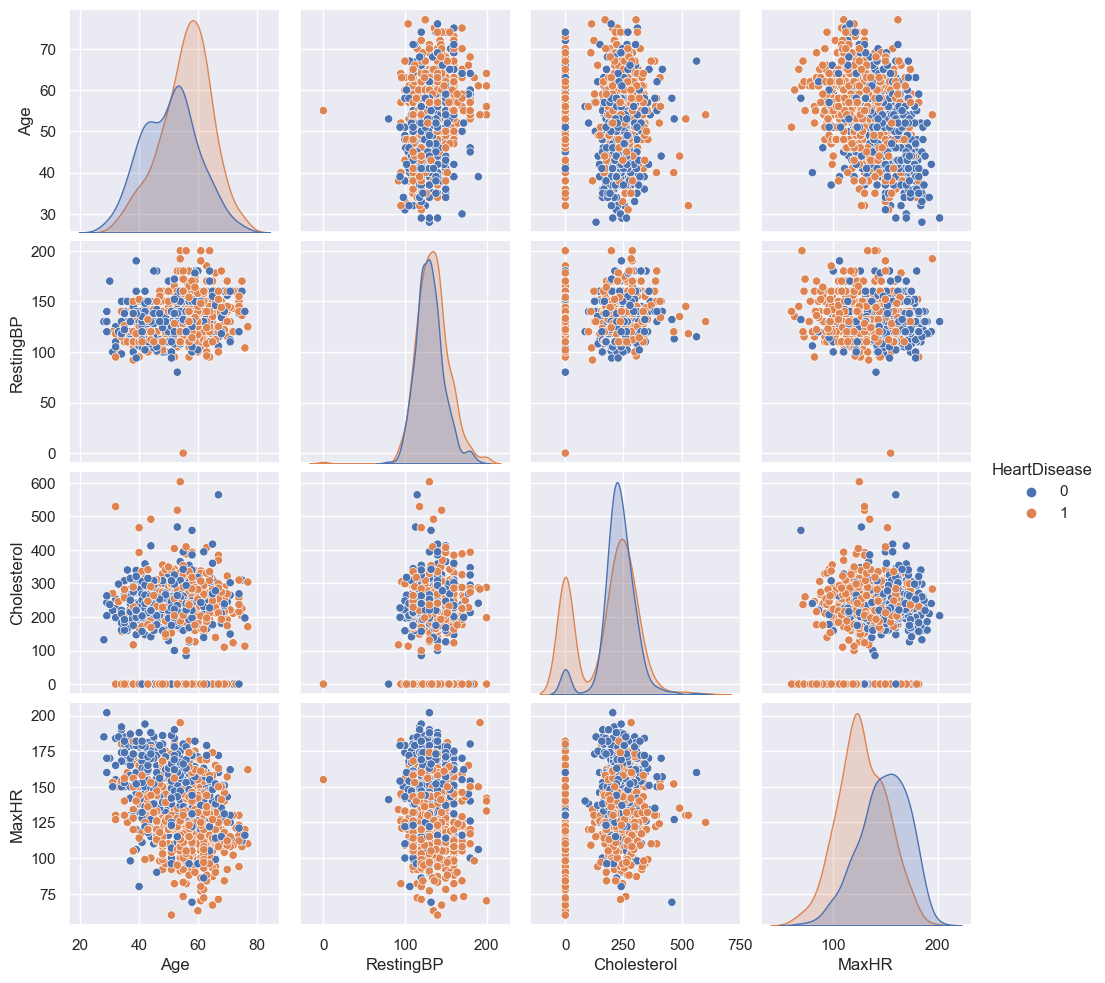

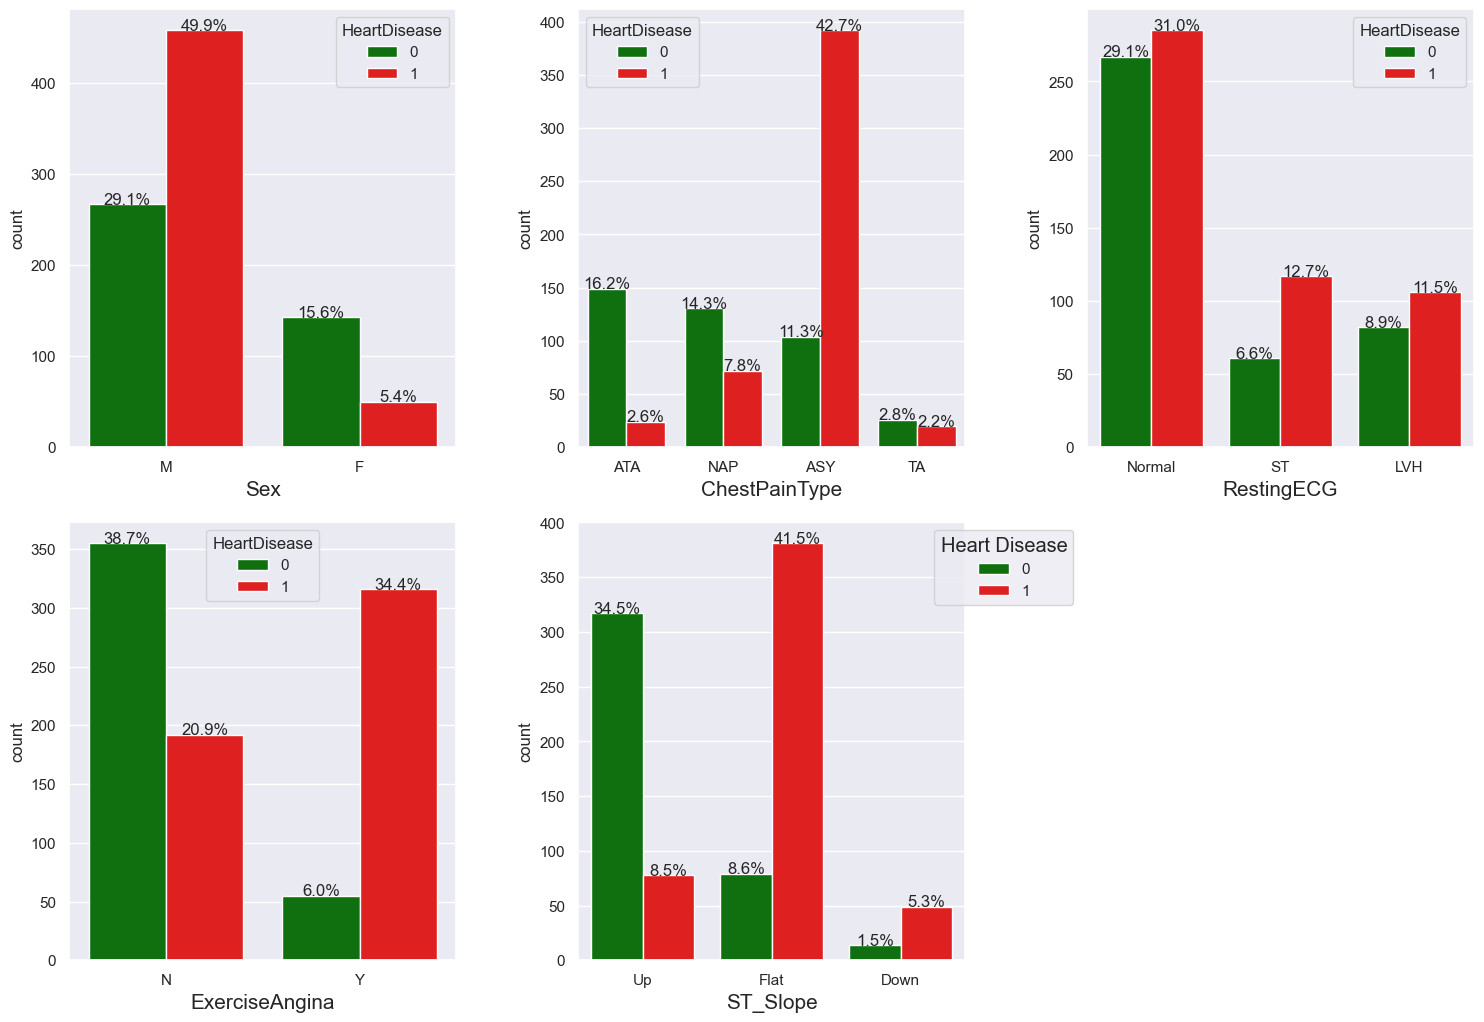

In [12]:
## ........................ Data Visualizations ............................ ## 

df['HeartDisease'].unique()

# Data Visualizations
sns.set(style="whitegrid")  # Set seaborn style
#sns.pairplot(df)

# Histogram of Age
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.text(50, 100, 'Histogram showing the distribution of age in the dataset', fontsize=12, ha='center')
plt.show()


# Bar plot of Sex
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', data=df, palette='Set2')
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

## Correlation Heatmap
sns.set()
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), cmap='GnBu', annot=True)
plt.title('Correlation Graph')
plt.show()

## Box plot of Age by Sex
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sex', y='Age', data=df, palette='pastel')
plt.title('Distribution of Age by Sex')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.show()

##  Bar plot of Chest Pain Type
plt.figure(figsize=(8, 6))
sns.countplot(x='ChestPainType', data=df, palette='muted')
plt.title('Distribution of Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')

# Annotate the chart with type names
plt.text(0, df['ChestPainType'].value_counts().max() * 0.9, 'Atypical Angina', ha='center')
plt.text(1, df['ChestPainType'].value_counts().max() * 0.9, 'Non-Anginal Pain', ha='center')
plt.text(2, df['ChestPainType'].value_counts().max() * 0.9, 'Asymptomatic', ha='center')
plt.text(3, df['ChestPainType'].value_counts().max() * 0.9, 'Typical Angina', ha='center')
plt.show()


### .......... With related heartdisease................

# Visualize the distribution of heart disease
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='HeartDisease', data=df)

# Annotate each bar with its count
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

#Box Plot of Numeric Features by Heart Disease
plt.figure(figsize=(10, 8))
sns.boxplot(x='HeartDisease', y='Age', data=df)
plt.title('Age Distribution by Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Age')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

# Violin Plot of Numeric Features by Heart Disease
plt.figure(figsize=(10, 8))
sns.violinplot(x='HeartDisease', y='RestingBP', data=df)
plt.title('Resting Blood Pressure Distribution by Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Resting Blood Pressure')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

#  Bar Plot of Categorical Features by Heart Disease
plt.figure(figsize=(10, 8))
sns.countplot(x='ChestPainType', hue='HeartDisease', data=df, palette='muted')
plt.title('Distribution of Chest Pain Type by Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

# Pie Chart of Heart Disease Prevalence by Sex
heart_disease_counts = df.groupby('Sex')['HeartDisease'].value_counts().unstack()
heart_disease_counts.plot(kind='pie', subplots=True, figsize=(12, 10), autopct='%1.1f%%')
plt.title('Heart Disease Prevalence by Sex')
plt.ylabel('')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

# Scatter Plot with Regression Line
plt.figure(figsize=(10, 8))
sns.regplot(x='Cholesterol', y='MaxHR', data=df)
plt.title('Cholesterol vs. Max Heart Rate')
plt.xlabel('Cholesterol')
plt.ylabel('Max Heart Rate')
plt.show()

## Scatter plot matrix
sns.pairplot(df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'HeartDisease']], hue='HeartDisease')
plt.show()


### Visualization of Categorical Variables by Heart Disease Status ..............

plt.figure(figsize=(15, 15))
custom_palette = {0: 'green', 1: 'red'}

for i, cat_var in enumerate(categorical_cols, start=1):
    plt.subplot(3, 3, i)  # Adjust the subplot position based on 'i'
    sns.countplot(x=cat_var, hue='HeartDisease', data=df, palette=custom_palette)
    
    # Calculate and display percentages on the bars
    ax = plt.gca()
    total = len(df)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center')
        
    plt.xlabel(cat_var, fontsize=15)

# Move the legend outside the plot
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), title='Heart Disease', title_fontsize='large')
plt.tight_layout()
plt.show()




Logistic Regression Accuracy: 0.8652173913043478

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        98
           1       0.90      0.86      0.88       132

    accuracy                           0.87       230
   macro avg       0.86      0.87      0.86       230
weighted avg       0.87      0.87      0.87       230


Confusion Matrix:
[[ 86  12]
 [ 19 113]]

Mean Squared Error (MSE): 0.13478260869565217
Root Mean Squared Error (RMSE): 0.3671275101319052
Mean Absolute Error (MAE): 0.13478260869565217


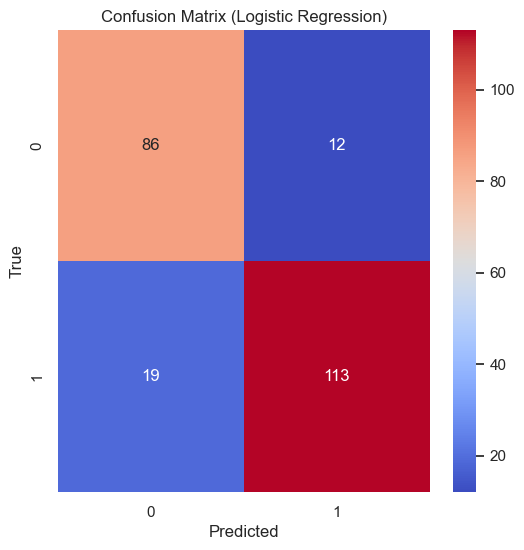




Decision Tree Accuracy: 0.8043478260869565

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.78      0.77        98
           1       0.83      0.83      0.83       132

    accuracy                           0.80       230
   macro avg       0.80      0.80      0.80       230
weighted avg       0.80      0.80      0.80       230



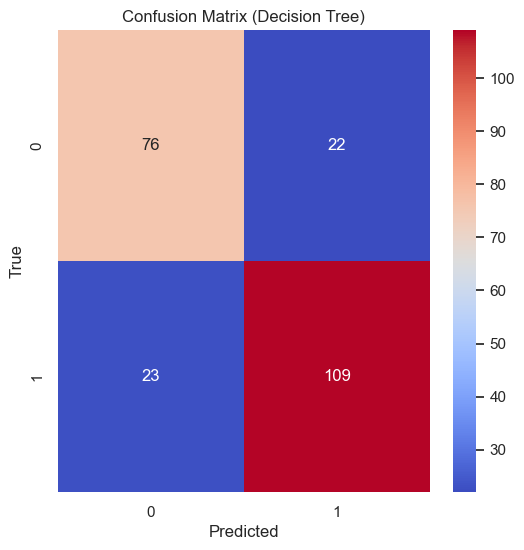

Confusion Matrix (Decision Tree): 
 [[ 76  22]
 [ 23 109]]


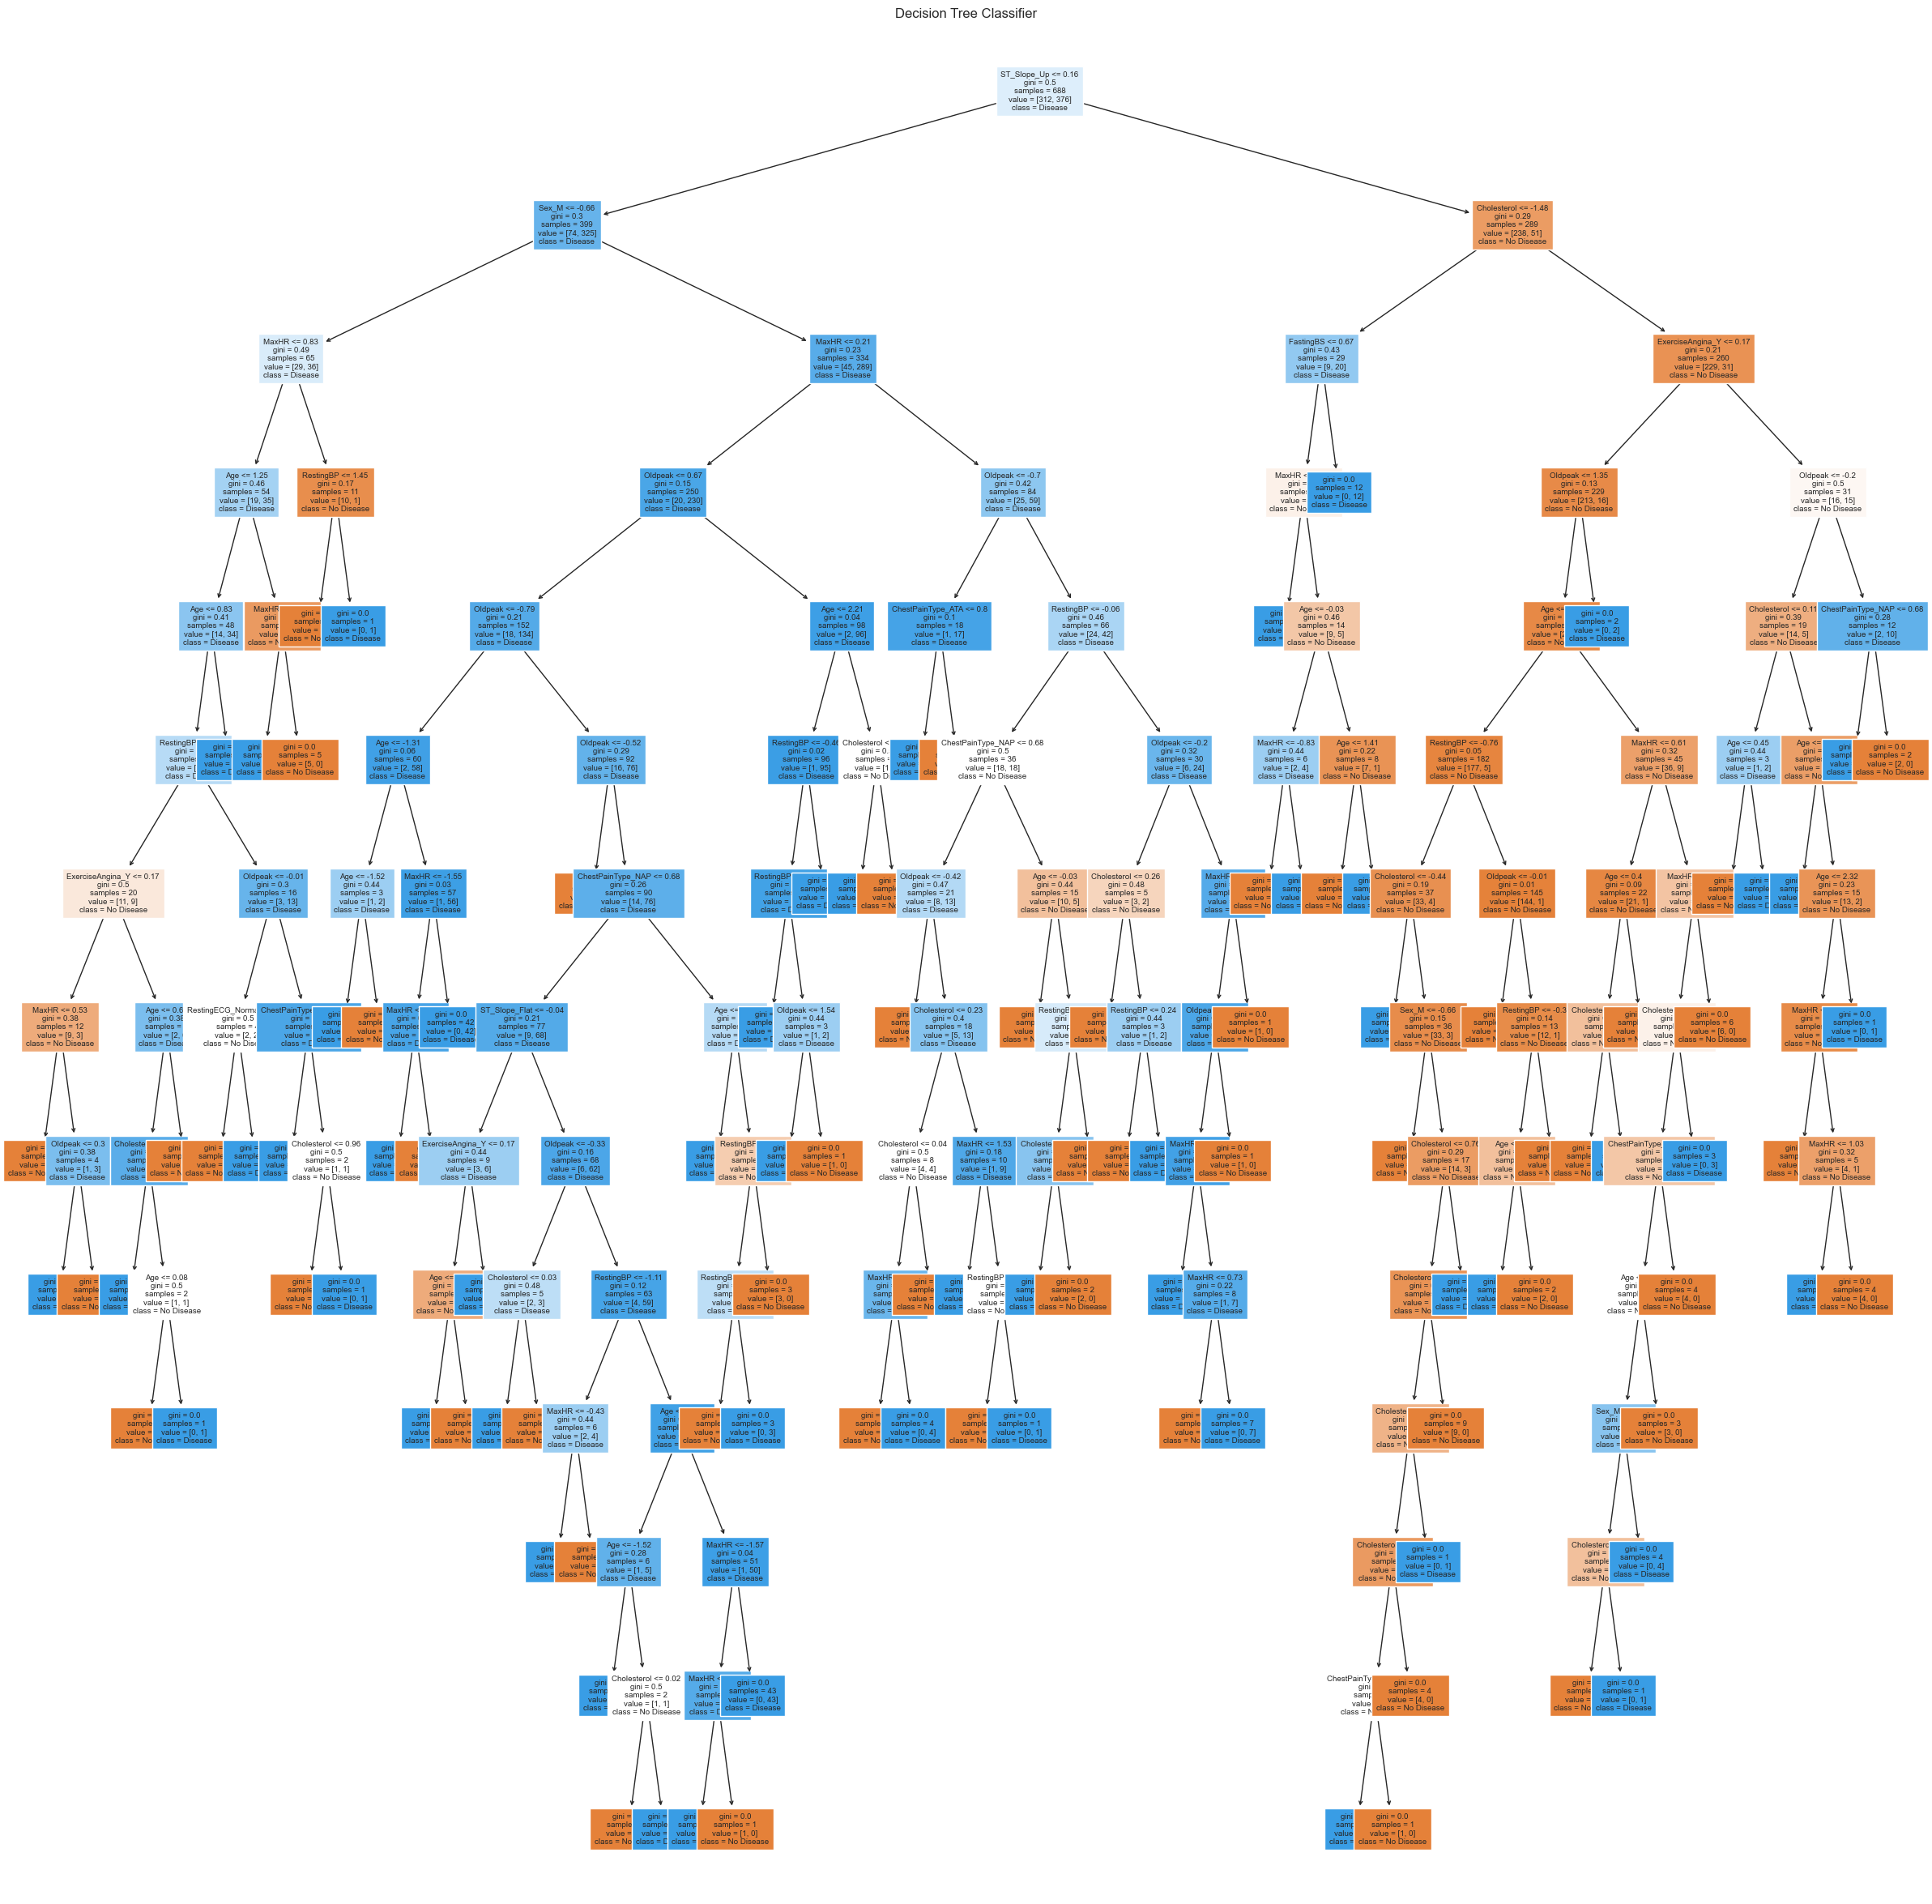




KNeighbors Classifier Accuracy: 0.8608695652173913

KNeighbors Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84        98
           1       0.90      0.86      0.88       132

    accuracy                           0.86       230
   macro avg       0.86      0.86      0.86       230
weighted avg       0.86      0.86      0.86       230


KNeighbors Classifier Confusion Matrix:
[[ 85  13]
 [ 19 113]]


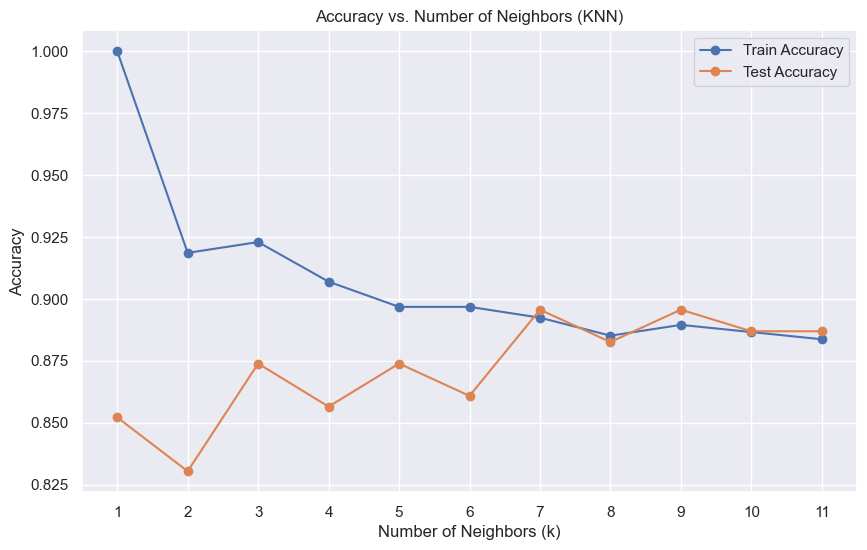

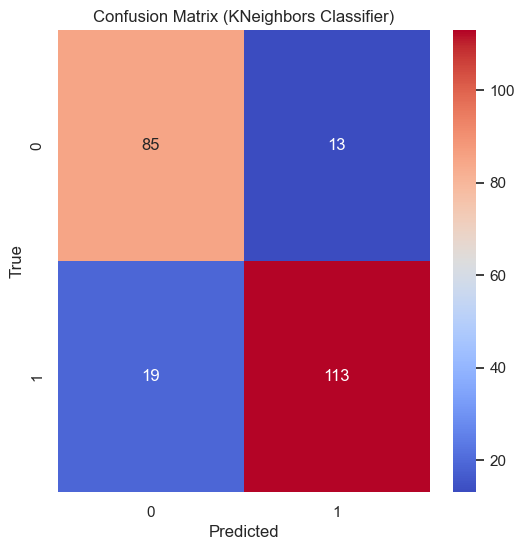




SVM Classifier Accuracy: 0.8608695652173913

SVM Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        98
           1       0.90      0.85      0.88       132

    accuracy                           0.86       230
   macro avg       0.86      0.86      0.86       230
weighted avg       0.86      0.86      0.86       230


SVM Classifier Confusion Matrix:
[[ 86  12]
 [ 20 112]]


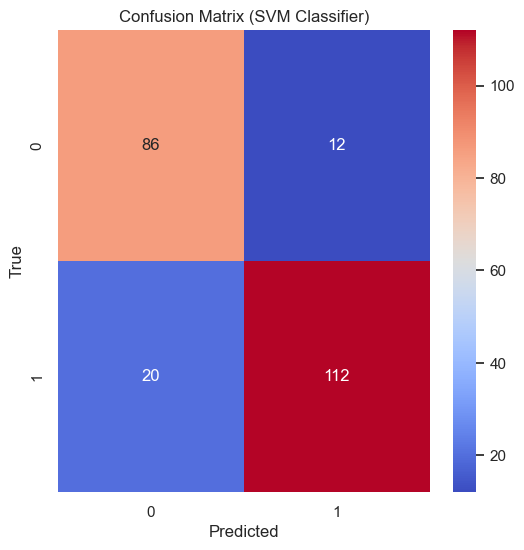




Naive Bayes Classifier Accuracy: 0.8652173913043478

Naive Bayes Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        98
           1       0.90      0.86      0.88       132

    accuracy                           0.87       230
   macro avg       0.86      0.87      0.86       230
weighted avg       0.87      0.87      0.87       230


Naive Bayes Classifier Confusion Matrix:
[[ 86  12]
 [ 19 113]]


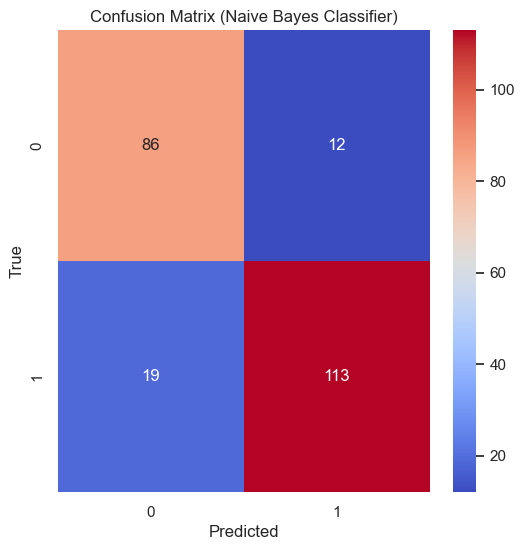

In [13]:
# # ...........................Model Development.............................................................## 



###  Data Preprocessing # ....................................

# Encode categorical variables
df_encoded = pd.get_dummies(df, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], drop_first=True)

# Split features and target variable
X = df_encoded.drop('HeartDisease', axis= 'columns')
y = df_encoded['HeartDisease']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



### Logistic Regression ..............................................

# Train logistic regression model
logistic_regression = LogisticRegression()

logistic_regression.fit(X_train_scaled, y_train)
    
# logistic_regression.fit(X_train_scaled, y_train)

# Make predictions
y_pred = logistic_regression.predict(X_test_scaled)

# Evaluate model
logit_accuracy = accuracy_score(y_test, y_pred)
print("\n\nLogistic Regression Accuracy:", logit_accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

print("\nMean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

# Confusion matrix for Logistic Regression
logit_cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(logit_cm, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()

# Cross-validation score for Logistic Regression
logistic_regression_cv_score = cross_val_score(logistic_regression, X_train_scaled, y_train, cv=5)


##### Decision Tree .............................................

# Train Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Make predictions using Decision Tree model
dt_y_pred = dt_model.predict(X_test_scaled)

# Evaluate Decision Tree model
dt_accuracy = accuracy_score(y_test, dt_y_pred)
print("\n\n\nDecision Tree Accuracy:", dt_accuracy)
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, dt_y_pred))

# Confusion matrix for Decision Tree
dt_cm = confusion_matrix(y_test, dt_y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Decision Tree)')
plt.show()

print("Confusion Matrix (Decision Tree): \n", dt_cm)

# Cross-validation score for Decision Tree
decision_tree_cv_score = cross_val_score(dt_model, X_train_scaled, y_train, cv=5)


# Visualize the Decision Tree with clearer text
plt.figure(figsize=(30, 30))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=['No Disease', 'Disease'], fontsize=7, precision=2)
plt.title("Decision Tree Classifier")
plt.show()





##################        

# Initialize and train KNeighborsClassifier model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors as needed
knn_model.fit(X_train_scaled, y_train)

# Make predictions using KNeighborsClassifier model
knn_y_pred = knn_model.predict(X_test_scaled)

# Evaluate KNeighborsClassifier model
knn_accuracy = accuracy_score(y_test, knn_y_pred)
print("\n\n\nKNeighbors Classifier Accuracy:", knn_accuracy)
print("\nKNeighbors Classifier Classification Report:")
print(classification_report(y_test, knn_y_pred))
print("\nKNeighbors Classifier Confusion Matrix:")
print(confusion_matrix(y_test, knn_y_pred))

#  K-Nearest Neighbors Classifier Accuracy with Varying Number of Neighbors

# Define the range of k values
k_values = range(1, 12)

# Initialize lists to store accuracy scores
train_accuracy = []
test_accuracy = []

# Iterate over each value of k
for k in k_values:
    # Initialize and train the KNN classifier
    classifier = KNeighborsClassifier(n_neighbors=k, metric="manhattan")
    classifier.fit(X_train_scaled, y_train)
    
    # Predict on the training set
    y_pred_train = classifier.predict(X_train_scaled) 
    accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
    train_accuracy.append(accuracy_train)
    
    # Predict on the test set
    y_pred_test = classifier.predict(X_test_scaled)
    accuracy_test = metrics.accuracy_score(y_test, y_pred_test)
    test_accuracy.append(accuracy_test)

# Plot the Accuracy vs. Number of Neighbors
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracy, label='Train Accuracy', marker='o')
plt.plot(k_values, test_accuracy, label='Test Accuracy', marker='o')
plt.title('Accuracy vs. Number of Neighbors (KNN)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

# Confusion matrix for KNeighborsClassifier
knn_cm = confusion_matrix(y_test, knn_y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (KNeighbors Classifier)')
plt.show()

# Cross-validation score for KNeighborsClassifier
knn_cv_score = cross_val_score(knn_model, X_train_scaled, y_train, cv=5)




##............SVM ............................................................

# Initialize and train SVM classifier
svm_model = SVC(kernel='linear')  # You can adjust the kernel type and other parameters as needed
svm_model.fit(X_train_scaled, y_train)

# Make predictions using SVM classifier
svm_y_pred = svm_model.predict(X_test_scaled)

# Evaluate SVM classifier
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print("\n\n\nSVM Classifier Accuracy:", svm_accuracy)
print("\nSVM Classifier Classification Report:")
print(classification_report(y_test, svm_y_pred))
print("\nSVM Classifier Confusion Matrix:")
print(confusion_matrix(y_test, svm_y_pred))

# Confusion matrix for SVM classifier
svm_cm = confusion_matrix(y_test, svm_y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (SVM Classifier)')
plt.show()

# Cross-validation score for SVM Classifier
svm_cv_score = cross_val_score(svm_model, X_train_scaled, y_train, cv=5)







############................. Naive Bayes .......................


# Initialize and train Naive Bayes classifier
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

# Make predictions using Naive Bayes classifier
nb_y_pred = nb_model.predict(X_test_scaled)

# Evaluate Naive Bayes classifier
nb_accuracy = accuracy_score(y_test, nb_y_pred)
print("\n\n\nNaive Bayes Classifier Accuracy:", nb_accuracy)
print("\nNaive Bayes Classifier Classification Report:")
print(classification_report(y_test, nb_y_pred))
print("\nNaive Bayes Classifier Confusion Matrix:")
print(confusion_matrix(y_test, nb_y_pred))

# Confusion matrix for Naive Bayes classifier
nb_cm = confusion_matrix(y_test, nb_y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Naive Bayes Classifier)')
plt.show()

# Cross-validation score for Naive Bayes Classifier
nb_cv_score = cross_val_score(nb_model, X_train_scaled, y_train, cv=5)


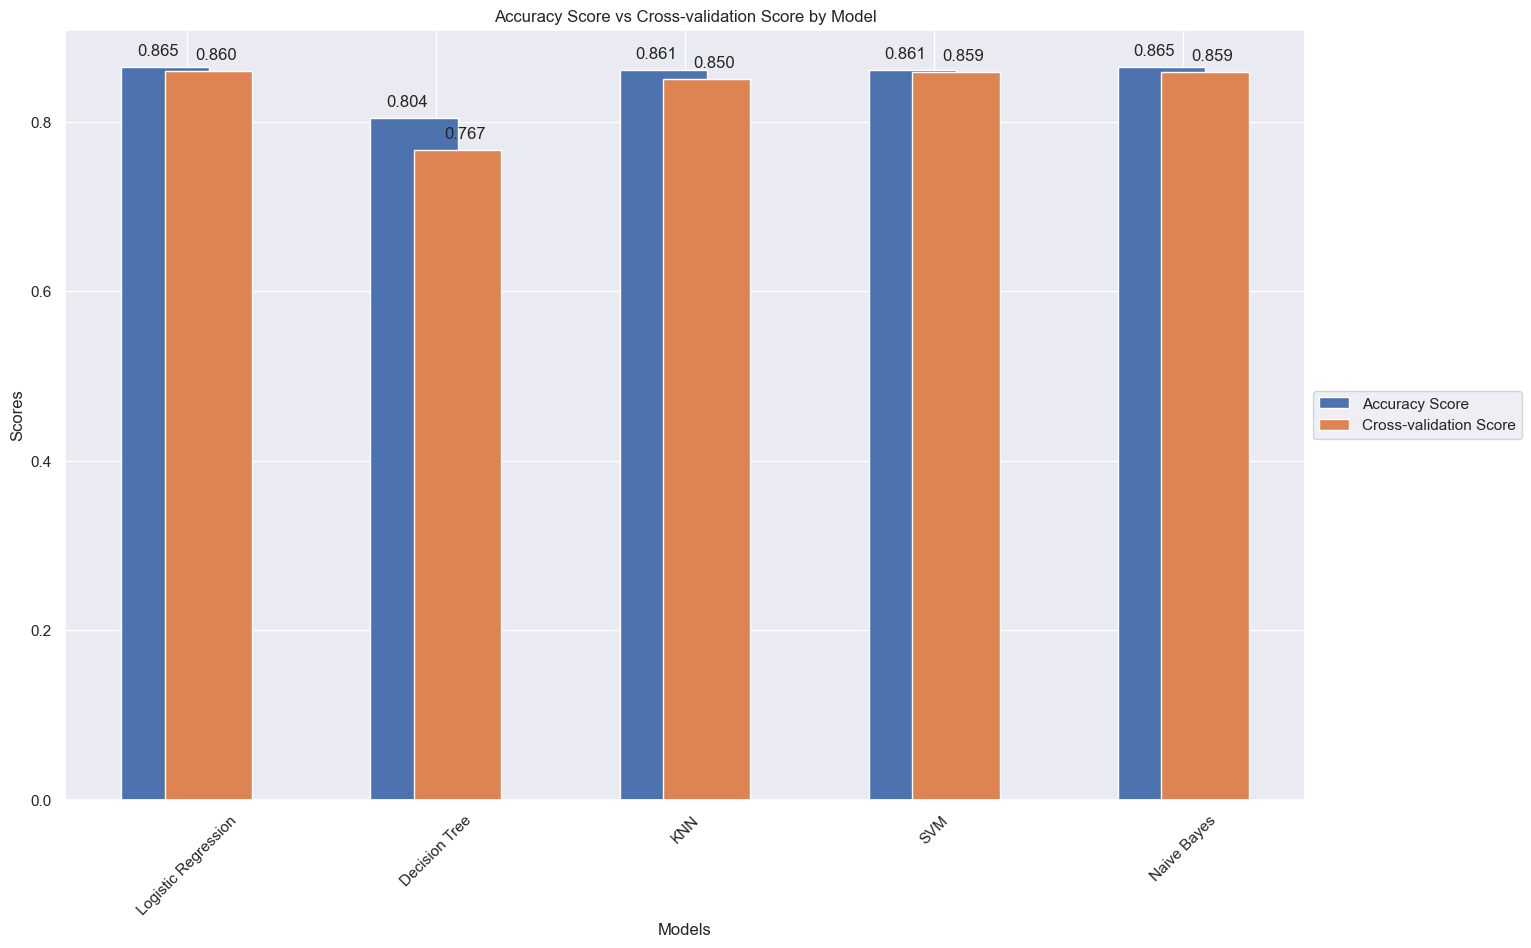

In [14]:
# comparison ...
    
# Create a bar plot for comparison
models = ['Logistic Regression', 'Decision Tree', 'KNN', 'SVM', 'Naive Bayes']
accuracy_scores = [logit_accuracy, dt_accuracy, knn_accuracy, svm_accuracy, nb_accuracy]
cv_scores = [logistic_regression_cv_score.mean(), decision_tree_cv_score.mean(), knn_cv_score.mean(), svm_cv_score.mean(), nb_cv_score.mean()]


x = np.arange(len(models))  
width = 0.35  

fig, ax = plt.subplots(figsize=(16, 10))
rects1 = ax.bar(x - width/4, accuracy_scores, width, label='Accuracy Score')
rects2 = ax.bar(x + width/4, cv_scores, width, label='Cross-validation Score')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Accuracy Score vs Cross-validation Score by Model')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45)
ax.legend()

# Add text annotations for accuracy scores
for i, v in enumerate(accuracy_scores):
    ax.text(i - width/3, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

# Add text annotations for cross-validation scores
for i, v in enumerate(cv_scores):
    ax.text(i + width/3, v + 0.01, f'{v:.3f}', ha='center', va='bottom')
    
# Add legend on the right side
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


In [15]:

##................. Hyperparameter Tuning ....................................##






# Define hyperparameter grids for each model
logistic_regression_params = {
    'model': LogisticRegression(),
    'params': {
        'C': [0.001, 0.01, 0.1, 1, 10],
        'penalty': ['l1', 'l2', 'elasticnet', 'none'],
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
    }
}

decision_tree_params = {
    'model': DecisionTreeClassifier(),
    'params': {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
}

k_neighbors_params = {
    'model': KNeighborsClassifier(),
    'params': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'minkowski']
    }
}

svm_params = {
    'model': SVC(),
    'params': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
    }
}

naive_bayes_params = {
    'model': GaussianNB(),
    'params': {}
}

# Combine all model parameters
all_params = [
    logistic_regression_params,
    decision_tree_params,
    k_neighbors_params,
    svm_params,
    naive_bayes_params
]



# Perform grid search for each model
grid_search_results = []
for params in all_params:
    model = params['model']
    param_grid = params['params']
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    grid_search_results.append((model.__class__.__name__, best_params, best_score))

# Print grid search results
for model_name, best_params, best_score in grid_search_results:
    print(f"\n\n\nBest parameters for {model_name}: {best_params}")
    print(f"Best cross-validation accuracy: {best_score}")
    print("--------------------------------------------------")
    
    




Best parameters for LogisticRegression: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation accuracy: 0.8661694700095207
--------------------------------------------------



Best parameters for DecisionTreeClassifier: {'criterion': 'gini', 'max_depth': 40, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best cross-validation accuracy: 0.803660213688776
--------------------------------------------------



Best parameters for KNeighborsClassifier: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
Best cross-validation accuracy: 0.867671638633238
--------------------------------------------------



Best parameters for SVC: {'C': 0.1, 'kernel': 'linear'}
Best cross-validation accuracy: 0.8647625092563208
--------------------------------------------------



Best parameters for GaussianNB: {}
Best cross-validation accuracy: 0.8589230931979266
--------------------------------------------------


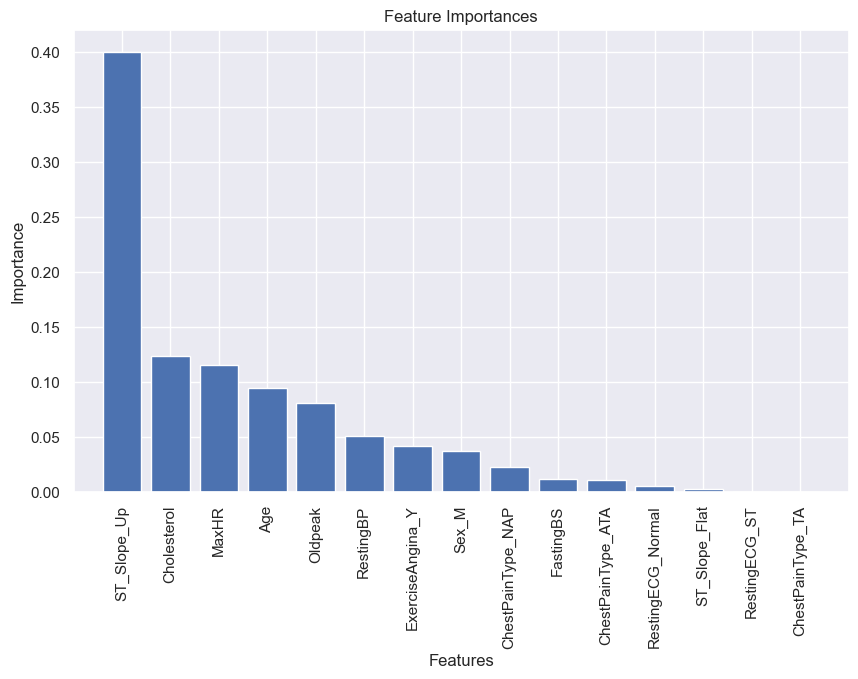

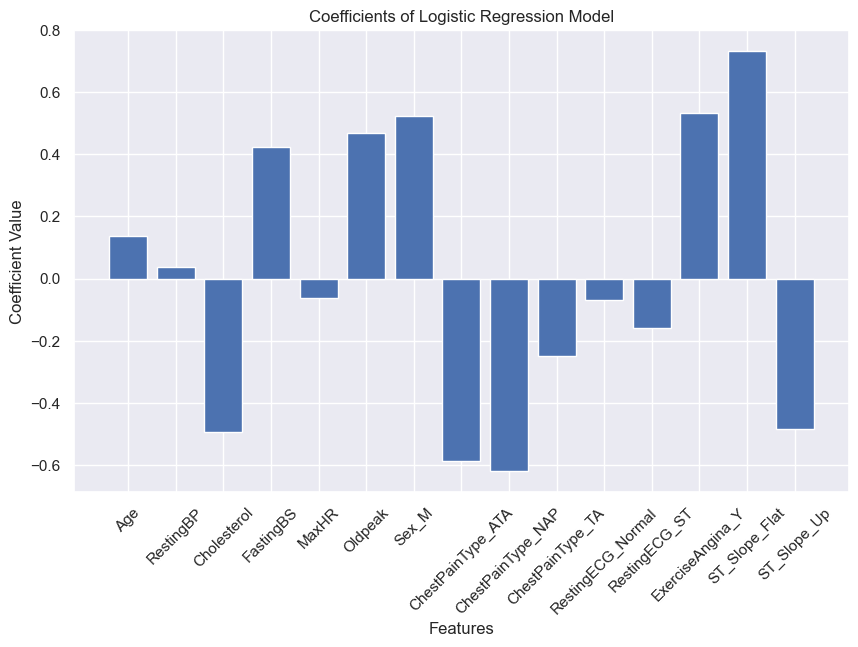

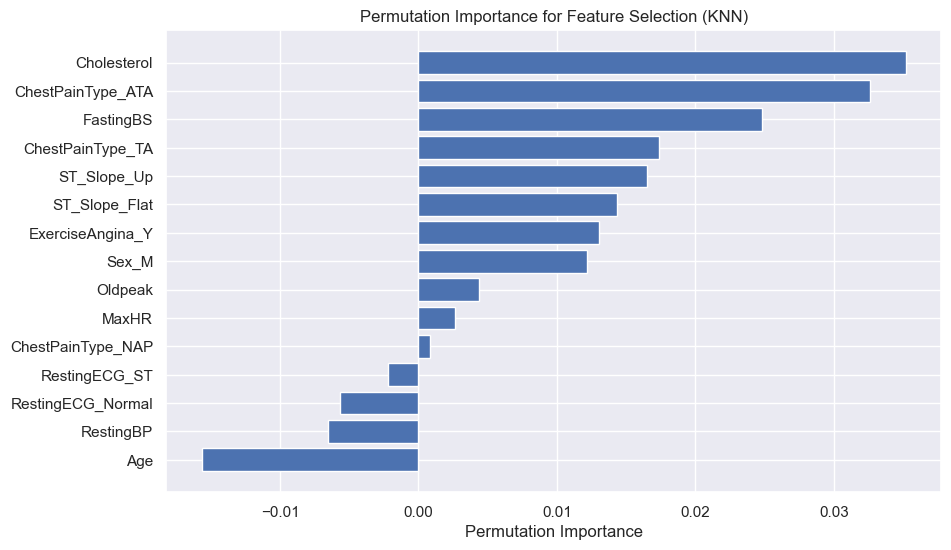

In [16]:
## ............................................................................##
## .................. Feature Importance Analysis ............................##


## By Decision Tree ................................

importances = dt_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Get feature names
feature_names = X.columns

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train_scaled.shape[1]), importances[indices],
       color="b", align="center")
plt.xticks(range(X_train_scaled.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X_train_scaled.shape[1]])
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

# By Logistic regression .............................

# Plotting coefficient of Logistic regression 
coefficient = logistic_regression.coef_[0]
plt.figure(figsize=(10, 6))
plt.bar(X_train.columns, coefficient)
plt.title("Coefficients of Logistic Regression Model")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.xticks(rotation=45)
plt.show()


### By K-Nearest Neighbors ...........................

from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Fit the model (replace KNeighborsClassifier with your desired model)
knn_model = KNeighborsClassifier(n_neighbors=5)  # Adjust the number of neighbors as needed
knn_model.fit(X_train_scaled, y_train)

# Perform permutation importance
perm_importance = permutation_importance(knn_model, X_test_scaled, y_test, n_repeats=10, random_state=42)

# Get feature importances and indices
sorted_idx = perm_importance.importances_mean.argsort()
feature_importances = perm_importance.importances_mean[sorted_idx]


# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(X_test_scaled.shape[1]), feature_importances, align='center')
plt.yticks(range(X_test_scaled.shape[1]), X.columns[sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Permutation Importance for Feature Selection (KNN)')
plt.show()


# ............................................................


In [17]:
##   Final Evaluation .................... by voting classifier

from sklearn.ensemble import VotingClassifier


# Best parameters after hyperparameter tuning
logistic_regression_params = {
    'C': 0.1,
    'penalty': 'l1',
    'solver': 'liblinear'
}

decision_tree_params = {
    'criterion': 'gini',
    'max_depth': 30,
    'min_samples_leaf': 4,
    'min_samples_split': 2
}

k_neighbors_params = {
    'metric': 'euclidean',
    'n_neighbors': 9,
    'weights': 'uniform'
}

svm_params = {
    'C': 0.1,
    'kernel': 'linear'
}

naive_bayes_params = {}


# Create tuned models
logit_tuned = LogisticRegression(**logistic_regression_params)
decision_tuned = DecisionTreeClassifier(**decision_tree_params)
knn_tuned = KNeighborsClassifier(**k_neighbors_params)
svm_tuned = SVC(**svm_params)
gnb_tuned = GaussianNB()

# Create a list of tuned models with their best parameters
model_tuned = [
    ('logit', logit_tuned),
    ('decision', decision_tuned),
    ('svm', svm_tuned),
    ('knn', knn_tuned),
    ('gnb', gnb_tuned)
]

# Create the VotingClassifier
voting_clf = VotingClassifier(estimators=model_tuned, voting='hard')

# Replace X_train_new_scaled and y_train with your actual training data
# Train and evaluate the VotingClassifier
voting_clf.fit(X_train_scaled, y_train)
y_pred_voting = voting_clf.predict(X_test_scaled)
accuracy_voting = accuracy_score(y_test, y_pred_voting)

print("\n\n\n Accuracy of Voting Classifier:", accuracy_voting)





 Accuracy of Voting Classifier: 0.8782608695652174


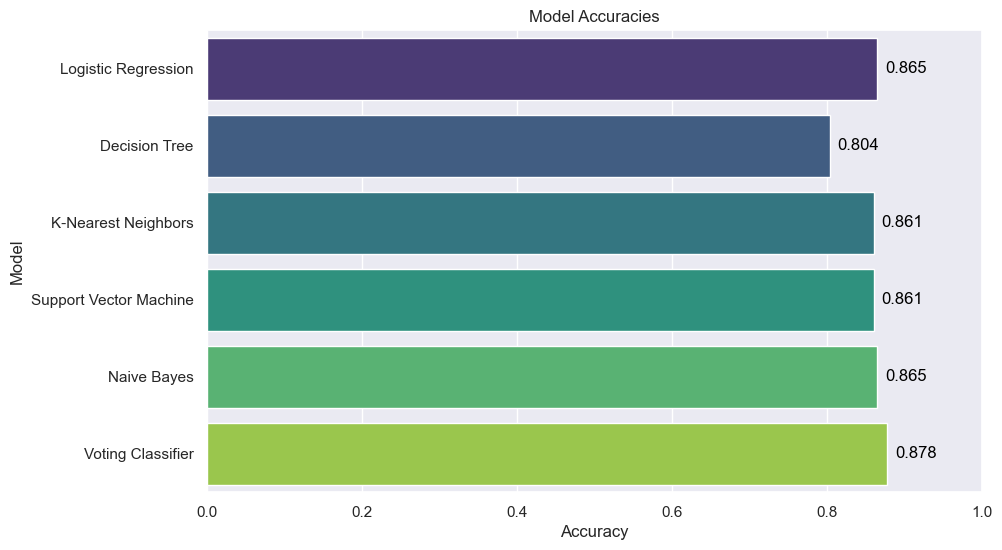

In [18]:
##....................................... Comparing Model ....................##

# Define model names and accuracies
model_names = ['Logistic Regression', 'Decision Tree', 'K-Nearest Neighbors', 'Support Vector Machine', 'Naive Bayes', 'Voting Classifier']
accuracies = [logit_accuracy, dt_accuracy, knn_accuracy, svm_accuracy, nb_accuracy, accuracy_voting]

# Create a DataFrame for easy plotting
df_accuracy = pd.DataFrame({'Model': model_names, 'Accuracy': accuracies})

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=df_accuracy, palette='viridis')
plt.title('Model Accuracies')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.xlim(0, 1)  # Set x-axis limit from 0 to 1

# Add text annotations for accuracy values on top of the bars
for i, v in enumerate(accuracies):
    plt.text(v + 0.01, i, f'{v:.3f}', color='black', va='center')
    
plt.show()

# ...............................................................

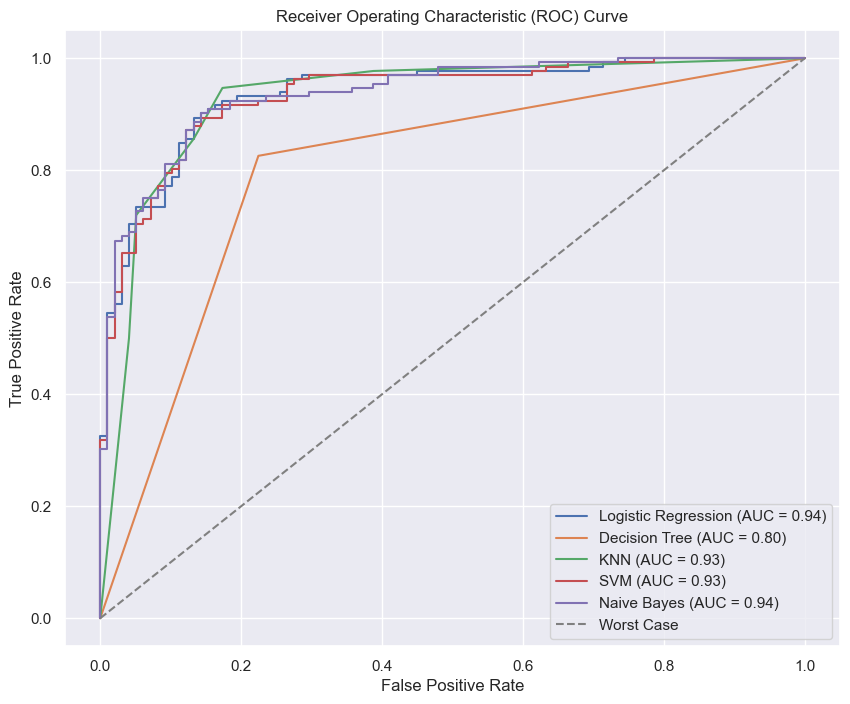

In [19]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for each model
logit_probs = logistic_regression.predict_proba(X_test_scaled)[:, 1]
dt_probs = dt_model.predict_proba(X_test_scaled)[:, 1]
knn_probs = knn_model.predict_proba(X_test_scaled)[:, 1]
svm_probs = svm_model.decision_function(X_test_scaled)
nb_probs = nb_model.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve and AUC for each model
logit_fpr, logit_tpr, _ = roc_curve(y_test, logit_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)

logit_auc = auc(logit_fpr, logit_tpr)
dt_auc = auc(dt_fpr, dt_tpr)
knn_auc = auc(knn_fpr, knn_tpr)
svm_auc = auc(svm_fpr, svm_tpr)
nb_auc = auc(nb_fpr, nb_tpr)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(logit_fpr, logit_tpr, label=f'Logistic Regression (AUC = {logit_auc:.2f})')
plt.plot(dt_fpr, dt_tpr, label=f'Decision Tree (AUC = {dt_auc:.2f})')
plt.plot(knn_fpr, knn_tpr, label=f'KNN (AUC = {knn_auc:.2f})')
plt.plot(svm_fpr, svm_tpr, label=f'SVM (AUC = {svm_auc:.2f})')
plt.plot(nb_fpr, nb_tpr, label=f'Naive Bayes (AUC = {nb_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Worst Case')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [20]:
# testing my input data..............................................................


model_filename = 'Heart_Failure_Prediction.pkl'

#C:\Users\jobay\OneDrive\Desktop\Thesis\Coding


#  Save the model
file_path = 'C:/Users/jobay/OneDrive/Desktop/Thesis/Coding/voting_model.pkl'
with open(file_path, 'wb') as file:
    pickle.dump(voting_clf, file)
print("\n\n\nModel saved successfully!")

#  Load the model
with open(file_path, 'rb') as file:
    loaded_model = pickle.load(file)
print("Model loaded successfully!")

# Test input CSV data
# Read the input CSV data
input_data = pd.read_csv('input_data.csv')  

# Now, make predictions using the loaded model
predictions = loaded_model.predict(input_data)

# Print or use the predictions as needed
print("\n\nPredictions for input data:")
print(predictions)




Model saved successfully!
Model loaded successfully!


Predictions for input data:
[1 1 0 1 1 0 1 1 1 1 0 1 1 1 0]
